A simple implementation of Linear Regression from scratch using Python and NumPy. This project demonstrates key concepts like gradient descent, cost function, and model evaluation without relying on machine learning libraries like scikit-learn. Ideal for learning fundamentals.


In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import statistics as stats

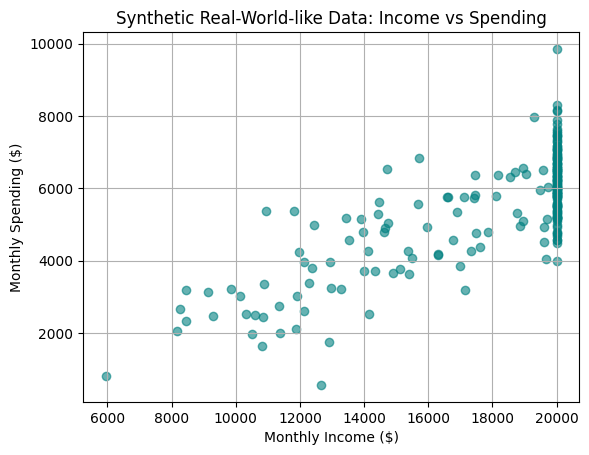

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# 1. Simulate income (X): skewed like real-world income
X = np.random.lognormal(mean=10, sigma=0.5, size=200)
X = np.clip(X, 2000, 20000)  # Cap extreme values

# 2. Generate spending (y) with linear relation + real-world noise
# Assume people spend ~0.3x of income + noise
noise = np.random.normal(loc=0, scale=1000, size=200)  # realistic variance
y = 0.3 * X + noise

# Ensure spending is not negative
y = np.clip(y, 0, None)

# 3. Combine into DataFrame
df = pd.DataFrame({'Income': X, 'Monthly_Spending': y})

# 4. Visualize
plt.scatter(df['Income'], df['Monthly_Spending'], alpha=0.6, color='teal')
plt.title("Synthetic Real-World-like Data: Income vs Spending")
plt.xlabel("Monthly Income ($)")
plt.ylabel("Monthly Spending ($)")
plt.grid(True)
plt.show()


In [19]:
# Before training
df["Income"] = (df["Income"] - df["Income"].mean()) / df["Income"].std()
df["Monthly_Spending"] = (df["Monthly_Spending"] - df["Monthly_Spending"].mean()) / df["Monthly_Spending"].std()


In [23]:
# Define Gradient Descent Linear Regression
# def gradient_descent(m_now, b_now, points, L):
#     m_gradient = 0
#     b_gradient = 0
#     n=len(points)

#     for i in range(n):
#         x = points.iloc[i].Income
#         y = points.iloc[i].Monthly_Spending

#         m_gradient += -(2/n) * x * (y-(m_now * x + b_now))
#         b_gradient += -(2/n) * (y-(m_now * x + b_now))

#     m = m_now - m_gradient * L
#     b = b_now - b_gradient * L
#     return m, b

def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = len(points)

    for i in range(n):
        x = points.iloc[i].Income
        y = points.iloc[i].Monthly_Spending

        y_pred = m_now * x + b_now
        error = y - y_pred

        m_gradient += -(2/n) * x * error
        b_gradient += -(2/n) * error

    m = m_now - L * m_gradient
    b = b_now - L * b_gradient
    return m, b


In [24]:
m = 0
b = 0
L = 0.0001
epochs = 300
for i in range(epochs):
    if i%50 == 0:
        print(f"Epoch : {i}")
    m, b = gradient_descent(m, b, df, L)

print(m, b)

Epoch : 0
Epoch : 50
Epoch : 100
Epoch : 150
Epoch : 200
Epoch : 250
0.045020572494794665 -2.0112730925170307e-17


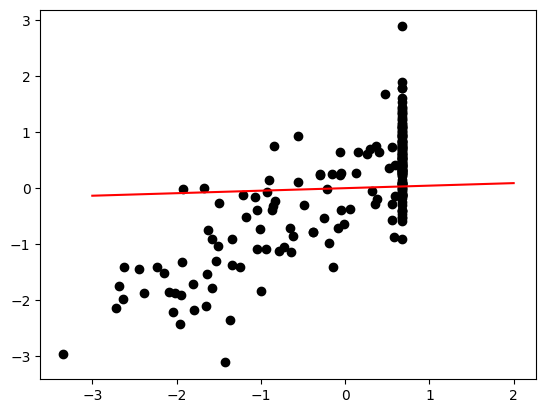

In [27]:
plt.scatter(df.Income, df.Monthly_Spending, color='black')
plt.plot(list(range(-3, 3)), [m * x + b for x in range(-3, 3)], color="red")
plt.show()

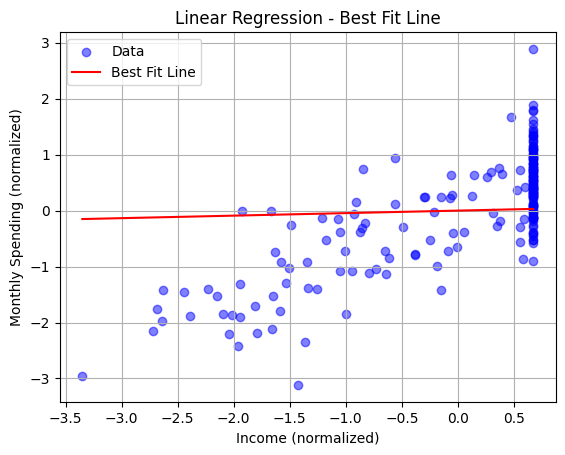

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Plot actual data points
plt.scatter(df["Income"], df["Monthly_Spending"], color="blue", alpha=0.5, label="Data")

# 2. Create line using final m and b
x_vals = np.linspace(df["Income"].min(), df["Income"].max(), 100)
y_vals = m * x_vals + b

# 3. Plot regression line
plt.plot(x_vals, y_vals, color="red", label="Best Fit Line")

# 4. Labels and legend
plt.xlabel("Income (normalized)")
plt.ylabel("Monthly Spending (normalized)")
plt.title("Linear Regression - Best Fit Line")
plt.legend()
plt.grid(True)
plt.show()


Thank you for going through this till the end, feel free to get in touch if you have any questions... :)